In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.decomposition import PCA

In [143]:
data = pd.read_csv('/').values
uid = data[:, 0]
spo2 = data[:, 1]
hr = data[:, 2]
temp = data[:, 3]
status = data[:, 4]
result = []

for stat in status:
  if stat == "Positive":
    result.append(1)
  else:
    result.append(0)



In [144]:
df_spo2 = np.array(spo2)
df_hr = np.array(hr)
df_temp = np.array(temp)
df_result = np.array(result)

df = pd.DataFrame({
    'SPO2': df_spo2,
    'HR': df_hr,
    'TEMP': df_temp,
    'RESULT': df_result
})

X = df[['SPO2', 'HR', 'TEMP']]
Y = df['RESULT']

In [145]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def perform(model, X_train, Y_train, X_test, Y_test):
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  #importances = model.feature_importances_
  print(model.__class__.__name__)
  print(f'Accuracy: {accuracy_score(Y_test, y_pred)}')
  #print(importances)
  #print(classification_report(Y_test, y_pred))
  print(confusion_matrix(Y_test, y_pred))
  print("")

# Train the model
RFC = RandomForestClassifier()
perform(RFC, X_train, Y_train, X_test, Y_test)

SVM = SVC(kernel='linear', C=1.0, random_state=42)
perform(SVM, X_train_scaled, Y_train, X_test_scaled, Y_test)

KNN = KNeighborsClassifier(n_neighbors=5)
perform(KNN, X_train, Y_train, X_test, Y_test)

LR = LogisticRegression(random_state=42)
perform(LR, X_train, Y_train, X_test, Y_test)

DT = DecisionTreeClassifier(random_state=42)
perform(DT, X_train, Y_train, X_test, Y_test)

GB = GradientBoostingClassifier(random_state=42)
perform(GB, X_train, Y_train, X_test, Y_test)

base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42) 
ABC = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
perform(ABC, X_train, Y_train, X_test, Y_test)

RandomForestClassifier
Accuracy: 1.0
[[1005    0]
 [   0  995]]

SVC
Accuracy: 0.924
[[920  85]
 [ 67 928]]

KNeighborsClassifier
Accuracy: 0.9845
[[990  15]
 [ 16 979]]

LogisticRegression
Accuracy: 0.9235
[[917  88]
 [ 65 930]]

DecisionTreeClassifier
Accuracy: 1.0
[[1005    0]
 [   0  995]]

GradientBoostingClassifier
Accuracy: 1.0
[[1005    0]
 [   0  995]]

AdaBoostClassifier
Accuracy: 1.0
[[1005    0]
 [   0  995]]



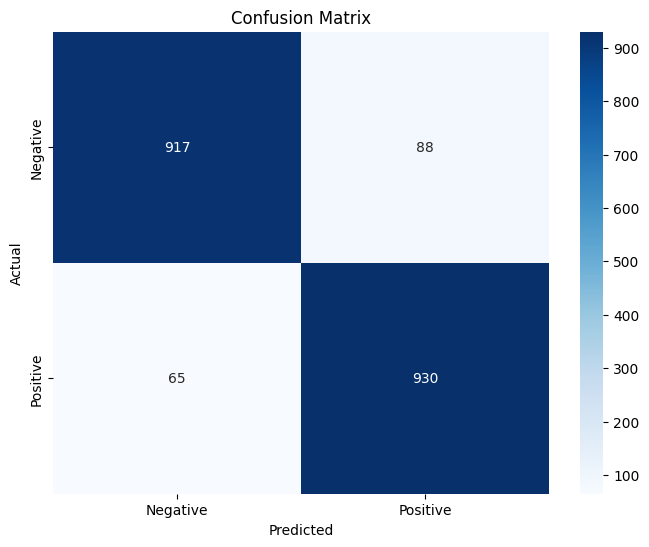

In [146]:

model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

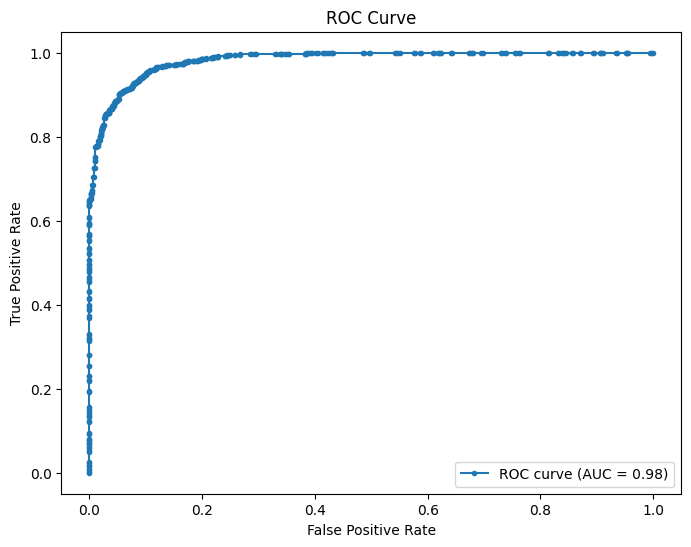

In [147]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

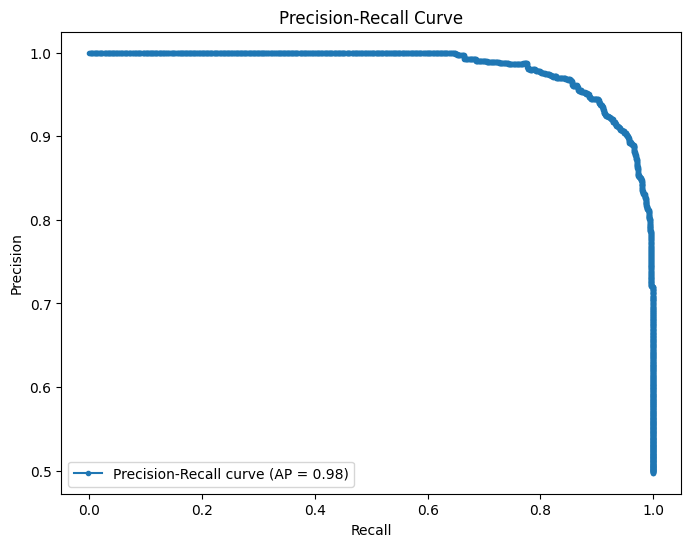

In [148]:
# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, model.predict_proba(X_test)[:,1])
average_precision = average_precision_score(Y_test, model.predict_proba(X_test)[:,1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

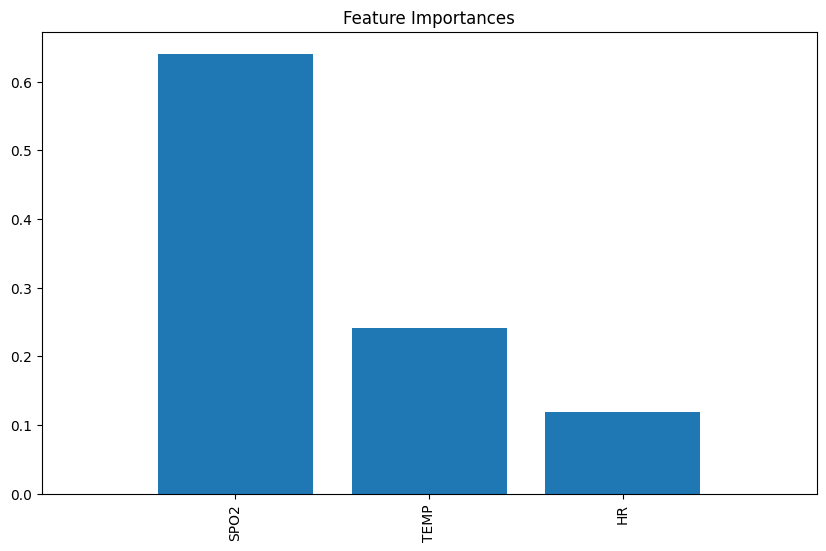

In [149]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()